# Directed Null Model Generation

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

import math

%matplotlib inline

In [3]:
import random
def double_edge_swap_directed(G, nswap=1, max_tries=100, seed=None):
    """Swap two edges in the graph while keeping the node in degree and out degree fixed.

    A double-edge swap selects two random edges
    and creates the new edges u->y and x->v::

     u-->v           u-->y
            becomes  
     x-->y           x-->v

    If either the edge u->y or x->v already exist no swap is performed
    and another attempt is made to find a suitable edge pair.

    Parameters
    ----------
    G : graph
       An undirected graph

    nswap : integer (optional, default=1)
       Number of double-edge swaps to perform

    max_tries : integer (optional)
       Maximum number of attempts to swap edges

    seed : integer, random_state, or None (default)
        Indicator of random number generation state.
        See :ref:`Randomness<randomness>`.

    Returns
    -------
    G : graph
       The graph after double edge swaps.

    Notes
    -----
    Does not enforce any connectivity constraints.

    The graph G is modified in place.
    """

    if nswap > max_tries:
        raise nx.NetworkXError("Number of swaps > number of tries allowed.")
    if len(G) < 4:
        raise nx.NetworkXError("Graph has less than four nodes.")
    # Instead of choosing uniformly at random from a generated edge list,
    # this algorithm chooses nonuniformly from the set of nodes with
    # probability weighted by degree.
    n = 0
    swapcount = 0
    keys, degrees = zip(*G.degree())  # keys, degree
    cdf = nx.utils.cumulative_distribution(degrees)  # cdf of degree
    discrete_sequence = nx.utils.discrete_sequence
    while swapcount < nswap:
        #        if random.random() < 0.5: continue # trick to avoid periodicities?
        # pick two random edges without creating edge list
        # choose source node indices from discrete distribution
        (ui, xi) = discrete_sequence(2, cdistribution=cdf, seed=seed)
       # print(type(ui))
        if ui == xi:
            continue  # same source, skip
            
        u = keys[ui]  # convert index to label
        x = keys[xi]

        # choose target uniformly from neighbors
        if(len(list(G[u])) >0 and len(list(G[x])) >0 ):
            v = random.choice(list(G[u]))
            y = random.choice(list(G[x]))
        else:

            continue
        if v == y:

            continue  # same target, skip
        if (v not in G[x]) and (y not in G[u]):  # don't create parallel edges
            if (u == y or x ==v): # dont create a self loop
                continue
            G.add_edge(u, y)
            G.add_edge(x, v)
            G.remove_edge(u, v)
            G.remove_edge(x, y)

            swapcount += 1
        if n >= max_tries:
            e = (
                f"Maximum number of swap attempts ({n}) exceeded "
                f"before desired swaps achieved ({nswap})."
            )
            raise nx.NetworkXAlgorithmError(e)
        n += 1
    return G

In [2]:
G = nx.read_edgelist('largest_component_networkx_format.csv', comments='#',
                     create_using=nx.DiGraph(), 
                     delimiter=',', 
                     nodetype=int, 
                     encoding='utf-8')

## Basic Features of this Network

In [4]:
N = len(G)
L = G.size()
degrees = [G.degree(node) for node in G]
kmin = min(degrees)
kmax = max(degrees)

in_degree

In [5]:
print("Number of nodes: ", N)
print("Number of edges: ", L)
print()
print("Average degree: ", 2*L/N)
print("Average degree (alternate calculation)", np.mean(degrees))
print()
print("Minimum degree: ", kmin)
print("Maximum degree: ", kmax)



Number of nodes:  8932
Number of edges:  14001

Average degree:  3.1350201522615317
Average degree (alternate calculation) 3.1350201522615317

Minimum degree:  1
Maximum degree:  381


In [6]:
# Get 10 logarithmically spaced bins between kmin and kmax
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=10)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

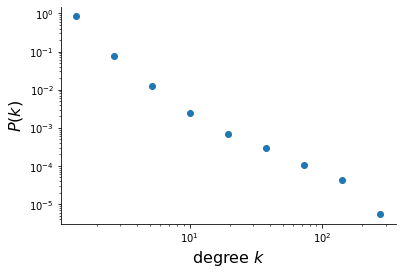

In [7]:
fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

In [8]:
# Get 20 logarithmically spaced bins between kmin and kmax
bin_edges = np.linspace(kmin, kmax, num=20)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

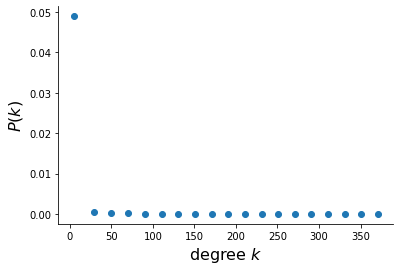

In [9]:
fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.plot(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

In [13]:
H = G.copy()

double_edge_swap_directed(H, nswap=100*len( G.edges() ), max_tries=1e75)

In [14]:
N_1 = len(H)
L_1 = H.size()
degrees_1 = [H.degree(node) for node in H]
kmin_1 = min(degrees_1)
kmax_1 = max(degrees_1)

print("Number of nodes: ", N_1)
print("Number of edges: ", L_1)
print()
print("Average degree: ", 2*L_1/N_1)
print("Average degree (alternate calculation)", np.mean(degrees))
print()
print("Minimum degree: ", kmin_1)
print("Maximum degree: ", kmax_1)

Number of nodes:  8932
Number of edges:  14001

Average degree:  3.1350201522615317
Average degree (alternate calculation) 3.1350201522615317

Minimum degree:  1
Maximum degree:  381


The Degree distribution seems to be the same

In [16]:
nx.is_weakly_connected(H)

False

In [4]:
def directed_connected_double_edge_swap(G, nswap=1, _window_threshold=3, seed=None):
    """Attempts the specified number of double-edge swaps in the graph `G`.

    A double-edge swap selects two random edges
    and creates the new edges u->x and v->y::

     u-->v           u-->y
            becomes  
     x-->y           x-->v

    If either `(u, x)` or `(v, y)` already exist, then no swap is performed
    so the actual number of swapped edges is always *at most* `nswap`.

    Parameters
    ----------
    G : graph
       An undirected graph

    nswap : integer (optional, default=1)
       Number of double-edge swaps to perform

    _window_threshold : integer

       The window size below which connectedness of the graph will be checked
       after each swap.

       The "window" in this function is a dynamically updated integer that
       represents the number of swap attempts to make before checking if the
       graph remains connected. It is an optimization used to decrease the
       running time of the algorithm in exchange for increased complexity of
       implementation.

       If the window size is below this threshold, then the algorithm checks
       after each swap if the graph remains connected by checking if there is a
       path joining the two nodes whose edge was just removed. If the window
       size is above this threshold, then the algorithm performs do all the
       swaps in the window and only then check if the graph is still connected.

    seed : integer, random_state, or None (default)
        Indicator of random number generation state.
        See :ref:`Randomness<randomness>`.

    Returns
    -------
    int
       The number of successful swaps

    Raises
    ------

    NetworkXError

       If the input graph is not connected, or if the graph has fewer than four
       nodes.

    Notes
    -----

    The initial graph `G` must be connected, and the resulting graph is
    connected. The graph `G` is modified in place.

    References
    ----------
    .. [1] C. Gkantsidis and M. Mihail and E. Zegura,
           The Markov chain simulation method for generating connected
           power law random graphs, 2003.
           http://citeseer.ist.psu.edu/gkantsidis03markov.html
    """
    if not nx.is_weakly_connected(G):
        raise nx.NetworkXError("Graph not connected")

    n = 0
    swapcount = 0
    deg = G.degree()
    # Label key for nodes
    keys, degrees = zip(*G.degree())  # keys, degree
    cdf = nx.utils.cumulative_distribution(list(d for n, d in G.degree()))
    discrete_sequence = nx.utils.discrete_sequence
    window = 1
    while n < nswap:
#         print("---------------------")
        wcount = 0
        swapped = []
        # If the window is small, we just check each time whether the graph is
        # connected by checking if the nodes that were just separated are still
        # connected.
        if window < _window_threshold:
            # This Boolean keeps track of whether there was a failure or not.
            fail = False
            while wcount < window and n < nswap:
                # Pick two random edges without creating the edge list. Choose
                # source nodes from the discrete degree distribution.
                (ui, xi) = discrete_sequence(2, cdistribution=cdf, seed=seed)
                # If the source nodes are the same, skip this pair.
                if ui == xi:
                    continue
                # Convert an index to a node label.
                u = keys[ui]  # convert index to label
#                 print("u: ")
#                 print(u)
                x = keys[xi]
#                 print("x: ")
#                 print(x)
                # Choose targets uniformly from neighbors.
                if(len(list(G[u])) >0 and len(list(G[x])) >0 ):
#                     print("Outgoing edges u:")
#                     print(list(G[u]))
                    v = random.choice(list(G[u]))
                    y = random.choice(list(G[x]))
#                     print("Outgoing edges x:")
#                     print(list(G[x]))
#                     print("v:")
#                     print(v)
            
#                     print("y:")
#                     print(y)
                else:
                    continue
                # If the target nodes are the same, skip this pair.
                if v == y:
#                     print("sametarget")
                    continue
                if (v not in G[x]) and (y not in G[u]):  # don't create parallel edges
                    if (u == y or x ==v): # dont create a self loop
                        continue
                    G.add_edge(u, y)
#                     print("edge_added: ")
#                     print(u)
#                     print("->")
#                     print(y)
                    G.add_edge(x, v)
#                     print("edge_added: ")
#                     print(x)
#                     print("->")
#                     print(v)

#                     print("_____removed Edges___")
                    G.remove_edge(u, v)
#                     print(u)
#                     print("->")
#                     print(v)
                    G.remove_edge(x, y)
#                     print(x)
#                     print("->")
#                     print(y)
#                     print("______________________")
                    swapped.append((u, v, x, y))
                    swapcount += 1
                n += 1
                # If G remains connected... WHY ARE BOTH NOT CHECKED?
                if nx.has_path(G, u, v):
                    wcount += 1
                # Otherwise, undo the changes.
                else:
                    G.add_edge(u, v)
                    G.add_edge(x, y)
#                     print("We made the Graph disconnected")
                    G.remove_edge(u, y)
                    G.remove_edge(x, v)
                    swapcount -= 1
                    fail = True
            # If one of the swaps failed, reduce the window size.
            if fail:
                window = int(math.ceil(window / 2))
            else:
                window += 1
        # If the window is large, then there is a good chance that a bunch of
        # swaps will work. It's quicker to do all those swaps first and then
        # check if the graph remains connected.
        else:
            while wcount < window and n < nswap:
                # Pick two random edges without creating the edge list. Choose
                # source nodes from the discrete degree distribution.
                (ui, xi) = nx.utils.discrete_sequence(2, cdistribution=cdf)
                # If the source nodes are the same, skip this pair.
                if ui == xi:
                    continue
                u = keys[ui]  # convert index to label
#                 print("u: ")
#                 print(u)
                x = keys[xi]
#                 print("x: ")
#                 print(x)
                # Choose targets uniformly from neighbors.
                if(len(list(G[u])) >0 and len(list(G[x])) >0 ):
#                     print("Outgoing edges u:")
#                     print(list(G[u]))
                    v = random.choice(list(G[u]))
                    y = random.choice(list(G[x]))
#                     print("Outgoing edges x:")
#                     print(list(G[x]))
#                     print("v:")
#                     print(v)
            
#                     print("y:")
#                     print(y)
                else:
                    continue
                # If the target nodes are the same, skip this pair.
                if v == y:
                    continue
                if (v not in G[x]) and (y not in G[u]):  # don't create parallel edges
                    if (u == y or x ==v): # dont create a self loop
                        continue
                    G.add_edge(u, y)
#                     print("edge_added: ")
#                     print(u)
#                     print("->")
#                     print(y)
                    G.add_edge(x, v)
#                     print("edge_added: ")
#                     print(x)
#                     print("->")
#                     print(v)

#                     print("_____removed Edges___")
                    G.remove_edge(u, v)
#                     print(u)
#                     print("->")
#                     print(v)
                    G.remove_edge(x, y)
#                     print(x)
#                     print("->")
#                     print(y)
#                     print("______________________")
                    swapped.append((u, v, x, y))
                    swapcount += 1
                n += 1
                wcount += 1
            # If the graph remains connected, increase the window size.
            if nx.is_weakly_connected(G):
                window += 1
            # Otherwise, undo the changes from the previous window and decrease
            # the window size.
            else:
                while swapped:
                    (u, v, x, y) = swapped.pop()
                    G.add_edge(u, v)
                    G.add_edge(x, y)
                    G.remove_edge(u, y)
                    G.remove_edge(x, v)
                    swapcount -= 1
                window = int(math.ceil(window / 2))
    return swapcount


In [23]:
H_1 = G.copy()

In [29]:
directed_connected_double_edge_swap(H_1, nswap=50*len( G.edges() ))

631878

In [27]:
nx.is_weakly_connected(H_1)

True

In [30]:
j = 3
nx.write_weighted_edgelist(H_1, "Directed_Random_Null_Model_{}".format(j))

In [6]:
for i in range(665,1000):
    H = G.copy()
    directed_connected_double_edge_swap(H, nswap=20*len( G.edges() ))
    nx.write_weighted_edgelist(H, "Directed_Unweighted_Models/Directed_Unweighted_Random_Null_Model_{}".format(i))